In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem as ch

In [4]:
df1 = pd.read_csv(".\\Data from CHEMBL\\AKT_B_act_789.tsv",sep='\t')
df2 = pd.read_csv(".\\Data from CHEMBL\\AKT_B_act_5431.tsv",sep='\t')
df3 = pd.read_csv(".\\Data from CHEMBL\\AKT_B_act_0.tsv",sep='\t')
df4 = pd.read_csv(".\\Data from CHEMBL\\AKT_F_act.tsv",sep='\t')

In [4]:
CHEM = pd.read_csv(".\\Data from CHEMBL\\old stuff\\AKT_binding_8activities.tsv",sep=None,engine="python")

In [5]:
CHEM.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1254432,NaN,0,337.33,0.0,-0.15,"5, PUG-NAc",CC(=O)N[C@@H]1/C(=N/OC(=O)Nc2ccccc2)CO[C@H](CO...,Activity,NaN,...,CHEMBL4282,Serine/threonine-protein kinase AKT,Homo sapiens,SINGLE PROTEIN,CHEMBL1250539,1,Scientific Literature,Bioorg. Med. Chem.,2010,NaN
1,CHEMBL219557,NaN,0,552.46,2.0,6.18,"10, SKI-758",COc1cc(Nc2c(C#N)cnc3cc(-c4coc(CN5CCN(C)CC5)c4)...,IC50,'>',...,CHEMBL4282,Serine/threonine-protein kinase AKT,Homo sapiens,SINGLE PROTEIN,CHEMBL1138859,1,Scientific Literature,J. Med. Chem.,2006,NaN
2,CHEMBL1253585,NaN,0,266.15,NaN,NaN,"2, Glc-NAc-selenazoline",CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)[...,Activity,NaN,...,CHEMBL4282,Serine/threonine-protein kinase AKT,Homo sapiens,SINGLE PROTEIN,CHEMBL1250539,1,Scientific Literature,Bioorg. Med. Chem.,2010,NaN
3,CHEMBL406375,NaN,0,234.26,0.0,3.98,"K00035, GTP-14564",c1ccc(-c2n[nH]c3c2oc2ccccc23)cc1,IC50,'>=',...,CHEMBL4282,Serine/threonine-protein kinase AKT,Homo sapiens,SINGLE PROTEIN,CHEMBL1145498,1,Scientific Literature,Proc. Natl. Acad. Sci. U.S.A.,2007,NaN
4,CHEMBL391738,NaN,0,524.45,2.0,5.16,"4, SKS-927",COc1cc(Nc2c(C#N)cnc3cc(C#CCCN4CCN(C)CC4)c(OC)c...,IC50,'>',...,CHEMBL4282,Serine/threonine-protein kinase AKT,Homo sapiens,SINGLE PROTEIN,CHEMBL1139073,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007,NaN


In [52]:
print(CHEM.columns)

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID'],
      dtype='object')


In [28]:
rows, cols = CHEM.shape
print("rows = {}, columns = {}".format(rows,cols))

rows = 8, columns = 41


In [7]:
CHEM['AlogP']

0   -0.15
1    6.18
2     NaN
3    3.98
4    5.16
5    4.06
6    3.89
7   -1.04
Name: AlogP, dtype: float64

In [12]:
#getting mol from smiles one by one
mol = []
for smile in CHEM['Smiles']:
    mol.append(ch.MolFromSmiles(smile))
print(mol)

[<rdkit.Chem.rdchem.Mol object at 0x000001CF8B582440>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B582530>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B582580>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B5825D0>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B582620>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B582670>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B5826C0>, <rdkit.Chem.rdchem.Mol object at 0x000001CF8B582710>]


In [42]:
#printing a sample molecule in .mol format
print(ch.MolToMolBlock(mol[0]))


     RDKit          2D

 24 25  0  0  0  0  0  0  0  0999 V2000
    5.2500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -6.4952    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -7.7942    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -9.0933    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000  -10.3923    0

In [26]:
print(mol[0].GetAromaticAtoms())

In [22]:
#regenerating the smiles
smiles = []
for m in mol:
    smiles.append(ch.MolToSmiles(m))
print(smiles)

['CC(=O)N[C@@H]1/C(=N/OC(=O)Nc2ccccc2)CO[C@H](CO)[C@H]1O', 'COc1cc(Nc2c(C#N)cnc3cc(-c4coc(CN5CCN(C)CC5)c4)c(OC)cc23)c(Cl)cc1Cl', 'CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)[Se]1', 'c1ccc(-c2n[nH]c3c2oc2ccccc23)cc1', 'COc1cc(Nc2c(C#N)cnc3cc(C#CCCN4CCN(C)CC4)c(OC)cc23)c(Cl)cc1Cl', 'O=C1N=C(NCc2cccs2)S/C1=C/c1ccc2ncccc2c1', 'C[C@H]1C(=O)N(c2ccc(S(=O)(=O)C(F)(F)F)cc2)C(=O)N1Cc1ccnc2ccccc12', 'CC1=N[C@H]2[C@H](O[C@H](CO)[C@@H](O)[C@@H]2O)S1']


In [30]:
#checking whether the regenerated smiles is same as original
count = 0
for i in range(rows):
    if smiles[i] != CHEM.iloc[i,7]:
        count += 1
print(count)

0


<b>Conclusion</b>: For the given data, the molecular structure has been converted to mol and then back to SMILES without any loss/change in representation.

In [35]:
#Obtaining the properties stored in mol object
for i in range(rows):
    print(mol[i].GetPropsAsDict(includePrivate=True, includeComputed= True))

{'__computedProps': <rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001CF8B51B570>, 'numArom': 1, '_StereochemDone': 1, '_smilesAtomOutputOrder': <rdkit.rdBase._vectunsigned int object at 0x000001CF8B51B690>}
{'__computedProps': <rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001CF8B51B690>, 'numArom': 4, '_StereochemDone': 1, '_smilesAtomOutputOrder': <rdkit.rdBase._vectunsigned int object at 0x000001CF8B51B570>}
{'__computedProps': <rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001CF8B51B570>, 'numArom': 0, '_StereochemDone': 1, '_smilesAtomOutputOrder': <rdkit.rdBase._vectunsigned int object at 0x000001CF8B51B690>}
{'__computedProps': <rdkit.rdBase._vectclass std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> > object at 0x000001CF8B51

In [38]:
for i in range(rows):
    print(mol[i].GetNumAtoms())

24
38
14
18
36
24
32
14


In [43]:
mol[0].GetNumHeavyAtoms()

24

In [44]:
mol[0].GetNumConformers()

0

<h3>Some Other Functions(in a mol object):</h3>
<ol>
    <li><b>SetProp:</b>sets one of the properties of the mol object</li>
    <li><b>AddConformer:</b>Used to add a conformer to the molecule</li>
    <li><b>GetAromaticAtoms:</b>Returns a read-only sequence containing all of the molecule's aromatic Atoms</li>
</ol>

In [49]:
#Writing in a file
w = ch.SDWriter('./data.sdf')
for m in mol:
    w.write(m)

In [50]:
#Reading from the same file
mol2 = ch.SDMolSupplier('./data.sdf')
for m in mol2:
    print(m.GetNumAtoms())

24
38
14
18
36
24
32
14


In [13]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df.to_csv("AKT_BINDING_ACTIVITIES.tsv",sep='\t')

<h2>Forming sheet 3</h2>

In [17]:
df = pd.read_excel('./Data from CHEMBL/AKT_Binding.xlsx',sheet_name='Activities')
df['Standard Type'].describe()

count     6492
unique      14
top       IC50
freq      3875
Name: Standard Type, dtype: object

In [18]:
df['Standard Type'].value_counts()

IC50                 3875
Inhibition           1578
Activity              511
EC50                  189
FC                    105
Kd                     66
Ratio                  62
Ratio IC50             51
Selectivity ratio      22
Ki                     15
INH                    13
IC90                    2
Drug uptake             2
AC50                    1
Name: Standard Type, dtype: int64

In [19]:
df2 = df.loc[df['Standard Type'] == 'IC50']
df2.describe()

,S.No.,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Assay Subcellular Fraction,Source ID,Document Year
count,3875.000000,3875.000000,3875.000000,3829.000000,3829.000000,3.754000e+03,3409.000000,2802.000000,2776.000000,2776.00000,2776.000000,0.0,3875.000000,3875.000000
mean,3001.856516,0.047742,447.080232,0.368765,3.263842,1.126443e+05,6.824972,15.692866,0.300022,3.42732,7.617514,NaN,12.975226,2013.449806
std,1793.312459,0.373409,107.965526,0.673677,1.563601,4.615679e+06,1.120108,3.618436,0.066545,1.95721,2.202426,NaN,16.963972,2.616663
min,0.000000,0.000000,182.230000,0.000000,-6.360000,1.000000e-01,4.010000,3.690000,0.080000,-4.88000,1.230000,NaN,1.000000,2000.000000
25%,1531.500000,0.000000,386.480000,0.000000,2.260000,2.500000e+01,6.010000,13.212500,0.250000,2.07750,6.100000,NaN,1.000000,2012.000000
50%,2864.000000,0.000000,440.470000,0.000000,3.270000,1.975000e+02,6.830000,15.640000,0.300000,3.56500,7.395000,NaN,1.000000,2014.000000
75%,4330.500000,0.000000,489.600000,1.000000,4.290000,1.800000e+03,7.680000,18.087500,0.350000,4.82000,8.870000,NaN,37.000000,2015.000000
max,6487.000000,4.000000,1143.450000,3.000000,9.510000,2.000000e+08,10.000000,35.300000,0.630000,10.73000,20.270000,NaN,37.000000,2018.000000


In [21]:
from openpyxl import load_workbook
book = load_workbook('./Data from CHEMBL/AKT_Binding.xlsx')
writer = pd.ExcelWriter('./Data from CHEMBL/AKT_Binding.xlsx', engine = 'openpyxl')
writer.book = book
df2.to_excel(writer,sheet_name='only IC50 data')
writer.save()
writer.close()

<h2>General format for creating sheet 3 and 4</h2>

In [25]:
path = './Data from CHEMBL/AKT_Functional.xlsx'
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
df = pd.read_excel(path,sheet_name='Activities')
df2 = df['Standard Type'].value_counts().to_frame()
df2.to_excel(writer,sheet_name='details')
df2 = df.loc[df['Standard Type'] == 'IC50']
df2.to_excel(writer,sheet_name='only IC50 data')
writer.save()
writer.close()

In [7]:
df = pd.read_excel('./Data from CHEMBL/AKT_functional.xlsx',sheet_name='Activities')
df['Standard Type'].value_counts()

Inhibition           564
Activity             380
IC50                 101
EC50                  17
Ratio                  5
Selectivity Index      5
FC                     3
AUEC                   3
fEC50                  2
Imax                   1
Drug uptake            1
ED50                   1
Name: Standard Type, dtype: int64

In [6]:
df = pd.read_excel('.\\Data from ChemBL\\AKT-binding_simplified.xlsx',sheet_name ='Step3')
df.head()

,Sno,ChEMBL_ID,Smiles,Standard_Value,Standard_Units,pChEMBL_Value,Class
0,1,CHEMBL3403664,C[C@H](Nc1ncnc(N)c1C#N)c1nc2ccc(F)cc2c(S(C)(=O...,0.10,nM,10.00,1
1,2,CHEMBL3899716,Cc1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br)CC3...,0.10,nM,10.00,1
2,3,CHEMBL3966806,CC(C)c1cc(-c2cn(CCN3CCC3)c(C3CCN(c4ncnc(N)c4Br...,0.15,nM,9.82,1
3,4,CHEMBL379300,Cc1n[nH]c2ccc(-c3cncc(OC[C@@H](N)Cc4c[nH]c5ccc...,0.16,nM,9.80,1
4,5,CHEMBL573326,N[C@H](COc1cncc(-c2ccc3c(c2)C(c2ccco2)C(=O)N3)...,0.17,nM,9.77,1


(array([ 15.,   0.,  71., 232., 450., 679., 653., 512., 233.,  16.]),
 array([ 2.35163999,  3.11647599,  3.88131199,  4.64614799,  5.41098399,
         6.17581999,  6.940656  ,  7.705492  ,  8.470328  ,  9.235164  ,
        10.        ]),
 <a list of 10 Patch objects>)

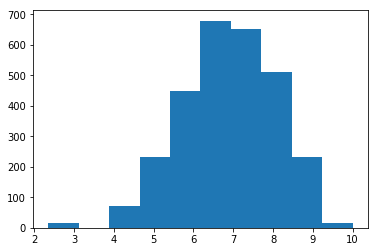

In [7]:
plt.hist(df['pChEMBL_Value'])